<a href="https://colab.research.google.com/github/keerthucit/EIP2Assignment/blob/master/TryAgain4a_Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Installation Of Keras

# https://keras.io/
!pip install -q keras
import keras


Using TensorFlow backend.


In [0]:
# Import Packages

import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import sgd
from keras import metrics
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,LearningRateScheduler
from keras.optimizers import SGD
import numpy as np
import sklearn.metrics as metrics
import h5py
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint


In [0]:
#Prevent tensorflow to allocate all the avaliable GPU Memory

import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.

k.tensorflow_backend.set_session(tf.Session(config=config))

In [0]:
from skimage import transform

# Load  and Normalize CIFAR10 Data
# Y - Category names
# x - Images

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

new_shape=(24,24,3)
x_train_24 =np.asarray([transform.resize(image, new_shape) for  image in x_train])
x_test_24 = np.asarray([transform.resize(image, new_shape) for  image in x_test])


170500096/170498071 [==============================] - 20s 0us/step


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [0]:
import tensorflow as tf
from keras import backend as k
import os

# Hyperparameters

batch_size = 32
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
num_classes = 10
epochs = 10
l = 12
num_filter = 16
compression=1.0
dropout_rate = 0.0



In [0]:
# Regularizer L2 

from keras import regularizers
# define vars
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10



model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 A

In [0]:
# Regularizer L1 

from keras import regularizers
# define vars
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10
model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", kernel_regularizer=<keras.reg..., units=500)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to

In [0]:
# DenseNet Model Functions
# Dense Block0:

def add_denseblock(input, nb_dense_block=4, growth_rate=12, num_filter=16, reduction=0.0, dropout_rate=0.0, weight_decay=1e-4, classes=10, weights_path=None):
#def add_denseblock(input, nb_dense_block=4, growth_rate=12, num_filter=16, reduction=0.0, dropout_rate=0.2, weight_decay=1e-4, classes=10, weights_path=None):
#def add_denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
       #Conv2D_3_3 = Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        Conv2D_3_3 = Conv2D(int(num_filter), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

In [0]:
def add_transition(input, num_filter = 16, dropout_rate = 0.0):
#def add_transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    Conv2D_BottleNeck = Conv2D(int(num_filter), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
      Conv2D_BottleNeck = Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = MaxPooling2D(pool_size=2, strides=2)(Conv2D_BottleNeck)
    
    return avg

In [0]:
def output_layer(input):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    #AvgPooling = keras.layers.GlobalAveragePooling2D(data_format=None)
    #output = Dense(num_classes, activation='softmax')(AvgPooling)   
    #AvgPooling = MaxPooling2D(pool_size=2, strides=2)(relu)
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='softmax')(flat)    
    return output

In [0]:
#Create DenseNet Model

num_filter = 16
#num_filter = 64
#dropout_rate = 0.2
dropout_rate=0.0
l = 12
#input = Input(shape=(None, None, channel,))
input = Input(shape=(img_height, img_width, channel,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = add_transition(First_Block, num_filter, dropout_rate)

Second_Block = add_denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = add_transition(Second_Block, num_filter, dropout_rate)

Third_Block = add_denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = add_transition(Third_Block, num_filter, dropout_rate)

#Last_Block = add_denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Third_Transition)


In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 32, 32, 16)   432         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 32, 32, 16)   64          conv2d_44[0][0]                  
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 32, 32, 16)   0           batch_normalization_40[0][0]     
__________________________________________________________________________________________________
conv2d_45 

In [0]:
# determine Loss function and Optimizer
#sgd=SGD(lr=1e-1, decay=1e-6, momentum=0.9, nesterov=True)
sgd=SGD(lr=1e-1,momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
# Data Augmentation Definition

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(rotation_range=15,    
              width_shift_range=0.1,        
              channel_shift_range=0.1,  
              horizontal_flip=True)  
    datagen.fit(x_train)

    


Using real-time data augmentation.


In [0]:
#Images Display 

from matplotlib import pyplot
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()

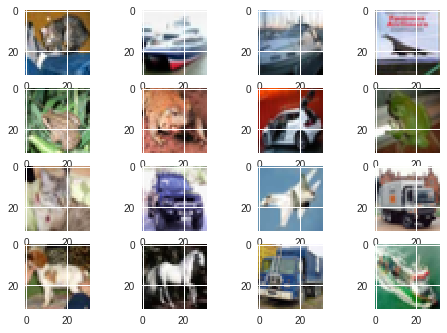

In [0]:

from scipy.misc import toimage
show_imgs(x_test[:18])

In [0]:
!fusermount -u drive
!google-drive-ocamlfuse drive


/bin/bash: fusermount: command not found
/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
#mount new if mount command fails
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive/MyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls -R /content/sample_data

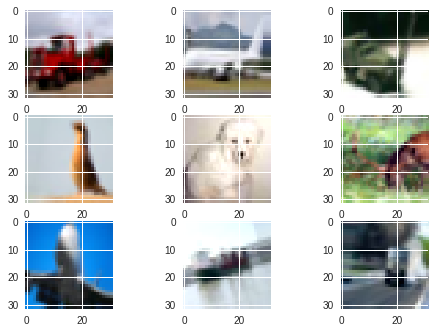

In [0]:
# Image Display

from matplotlib import pyplot as plt
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(toimage(X_batch[i].reshape(x_train.shape[1], x_train.shape[2], 3)))
    # show the plot
    pyplot.show()
    break

In [0]:
#LR Schedule Function
def lr_schedule(epoch):
    lrate = 0.1
    if epoch > 32:
        lrate = 0.15
    elif epoch > 48:
        lrate = 0.2        
    return lrate

In [0]:
# CallBacks Definition

batch_size = 128

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=60,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

#Training - Epochs 1 to 60 (max val_acc: 85.80%)

Epoch 1/60
390/390 [==============================] - 180s 461ms/step - loss: 0.2106 - acc: 0.9259 - val_loss: 0.4337 - val_acc: 0.8634
Epoch 2/60
390/390 [==============================] - 180s 461ms/step - loss: 0.2044 - acc: 0.9280 - val_loss: 0.4380 - val_acc: 0.8683
Epoch 3/60
390/390 [==============================] - 180s 461ms/step - loss: 0.1987 - acc: 0.9296 - val_loss: 0.4355 - val_acc: 0.8661
Epoch 4/60
390/390 [==============================] - 180s 461ms/step - loss: 0.1975 - acc: 0.9295 - val_loss: 0.4693 - val_acc: 0.8607
Epoch 5/60
390/390 [==============================] - 180s 461ms/step - loss: 0.1959 - acc: 0.9315 - val_loss: 0.5047 - val_acc: 0.8566
Epoch 6/60
390/390 [==============================] - 180s 461ms/step - loss: 0.1961 - acc: 0.9303 - val_loss: 0.4389 - val_acc: 0.8655
Epoch 7/60
390/390 [==============================] - 180s 461ms/step - loss: 0.1974 - acc: 0.9307 - val_loss: 0.4641 - val_acc: 0.8595
Epoch 8/60
390/390 [============================

In [0]:
#First 60 epochs training
# Use checkpoint versions to save partially trained model [12 hrs  for colab]
# Fit the model on the batches generated by datagen.flow()
##reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=1e-5)
# checkpoint
##filepath="/content/sample_data/PreTrain_weights-improvement-{epoch:03d}-{val_acc:.3f}.hdf5"
##model_checkpoint =keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_weights_only=True,save_best_only=True, verbose=1, mode='max')
##callbacks_list = [reduce_lr,model_checkpoint]
##history=model.fit(x_train, y_train,batch_size=128, initial_epoch=0, epochs=30, verbose=1, validation_data=(x_test, y_test), validation_split=0.2,callbacks=callbacks_list)




In [0]:
loss, acc = model.evaluate(x_test,y_test)
print("Model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 13s 1ms/step
Model, accuracy: 85.80%


In [0]:
#Create a new, untrained model. When restoring a model from only weights, must have a model with the same architecture as the original model. 
#Since it's the same model architecture, we can share weights despite that it's a different instance of the model.
#Now rebuild a fresh, untrained model, and evaluate it on the test set. An untrained model will perform at chance levels (~10% accuracy):

Then load the weights from the checkpoint, and re-evaluate:

In [0]:
model.save_weights('/content/sample_data/my_modelweightsfirst60epochs.h5')


In [0]:

# Save entire model to a HDF5 file
model.save('/content/sample_data/mymodelfirst60epochs.h5')

In [0]:
!ls -ltR /content/sample_data

In [0]:
# Recreate the exact same model, including weights and optimizer.

firstepochs_model = keras.models.load_model('/content/sample_data/mymodelfirst60epochs.h5')


In [0]:
plot_history(history)

In [0]:

batch_size=64

sgd=SGD(lr=0.15,decay=1e-6,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch= x_train.shape[0] // batch_size,epochs=30,\
                    verbose=1,validation_data=(x_test,y_test))


model.save_weights('/content/sample_data/my_modelweightsecondsetepochs.h5')

# Save entire model to a HDF5 file
model.save('/content/sample_data/mymodelsecondsetepochs.h5')

Training - Epochs 1 to 30 (max val_acc: 89.58%)

Epoch 1/30
781/781 [==============================] - 218s 279ms/step - loss: 0.0598 - acc: 0.9785 - val_loss: 0.4550 - val_acc: 0.8937
Epoch 2/30
781/781 [==============================] - 208s 266ms/step - loss: 0.0589 - acc: 0.9795 - val_loss: 0.4546 - val_acc: 0.8955
Epoch 3/30
781/781 [==============================] - 208s 266ms/step - loss: 0.0608 - acc: 0.9788 - val_loss: 0.4516 - val_acc: 0.8969
Epoch 4/30
781/781 [==============================] - 208s 266ms/step - loss: 0.0597 - acc: 0.9791 - val_loss: 0.4447 - val_acc: 0.8963
Epoch 5/30
781/781 [==============================] - 208s 266ms/step - loss: 0.0606 - acc: 0.9791 - val_loss: 0.4557 - val_acc: 0.8954
Epoch 6/30
781/781 [==============================] - 208s 266ms/step - loss: 0.0588 - acc: 0.9790 - val_loss: 0.4563 - val_acc: 0.8955
Epoch 7/30
781/781 [==============================] - 208s 266ms/step - loss: 0.0594 - acc: 0.9788 - val_loss: 0.4668 - val_acc: 0.8928
Epoch 8/30
781/781 [============================

In [0]:
 # Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:

#The training configuration of the model (loss, optimizer).
loss, acc =model.evaluate(x_test,y_test)
print("Model after Fourth set of epochs, accuracy: {:5.2f}%".format(100*acc))

In [0]:
print ((model.get_weights()))
